# Çoklu Lineer Regresyon Proje

## Araba Fiyat Tahmini

### Problem Tanımı:

1980'lerde Uzakdoğu'dan bir araba üreticisi, Amerika pazarına girmek istemektedir.

Araba fiyatları üzerinde hangi faktörlerin önemli olduğunu öğrenmek için bir danışmanlık firması ile anlaşırlar.

Öğrenmek istedikleri:
* Arabaların fiyatlarını belirlemede hangi değişken/değişkenler önemlidir
* Bu değişkenler, araba fiyatlarını ne ölçüde etkilemektedir.

Bu talepler doğrultusunda, danışmanlık firması çeşitli markalar ve modeller üzerinden veriler toplamıştır.

Bizim görevimiz fiyatın hangi değişkenlere göre ve ne ölçüde değiştiğini gösteren bir model hazırlamak ve sunmaktır.

https://archive.ics.uci.edu/ml/datasets/Automobile

#### Kütüphaneleri import edelim

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
# warning mesajları için
import warnings
warnings.simplefilter(action='ignore', category=Warning)

#### Veriyi Anlayalım

In [149]:
df = pd.read_csv('data\Automobile.csv')

In [150]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [151]:
#genel bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [152]:
#istatistiksel genel bilgiler
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [153]:
#verini şekli
df.shape

(205, 26)

In [154]:
#toplam gözlem sayısı (n)
len(df)

205

In [155]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [156]:
#kaç adet numeric sütun var
#price(y) da numeric sütun
len(df.describe().columns)

16

Dolayısı ile data içinde:
* Toplam 26 sütun var
* Bunlardan 25'i girdi (input) sütunları, 1'i çıktı (y) sütunu
* Girdi sütunlarının 15'i sayısal sütun, 10'u kategorik

#### Veri Ön İşleme

In [157]:
# her sütun içindeki tekil (unique) veri adedini görelim
for col in df.columns:
    print(col, df[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [158]:
# Kategorik olan sütunlar için değerleri görelim

for col in df.columns:
    values = []
    
    # numerik olmayanlar -> kategorik
    if col not in df.describe().columns:
        for val in df[col].unique():
            values.append(val)
        
        print("{0} -> {1}".format(col, values))

CarName -> ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)'

In [159]:
#model adlarını görelim
df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

Gördüğümüz gibi model adları çok karmaşık. İlk kelimeler üretici adı, diğerleri model adı.

Üretici Adı - Model Adı şeklinde ayırıp Üretici Adlarını alalım.

In [160]:
manufacturer= df["CarName"].apply(lambda x: x.split(' '))
manufacturer

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [161]:
manufacturer= df["CarName"].apply(lambda x: x.split(' ')[0])
manufacturer

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [162]:
data=df.copy()

In [163]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [164]:
#CarName sütununu data'dan çıkaralım
data.drop(columns=["CarName"], axis=1, inplace=True)

In [165]:
data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [166]:
#Yeni hazırladığımız manufecturer sütununu ekleyelim
data.insert(3, "manufacturer", manufacturer)

In [167]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [168]:
#hangi üreticinin kaç adet arabası var bu data'da
data.groupby(by="manufacturer").count()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
manufacturer,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


Üretici adlarında hatalar var
* toyota, toyouta
* mazda, maxda
* Nissan, nissan
* ...

Bunları düzeltelim:

In [169]:
#Öncelikle tüm değerleri görelim
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [171]:
#büyük küçük harf düzeltmesi
data.manufacturer= data.manufacturer.str.lower()

In [172]:
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [173]:
#hatalı firma isimlerini düzeltmek için
data.replace({"maxda": "mazda",
            'porcshce':'porsche',
            'vokswagen': 'vw',
             'volkswagen':'vw',
             'toyouta':'toyota'}, inplace=True)

In [174]:
data.manufacturer.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [175]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Tekli (Univariate) Analiz

Değişkenlere tek tek kendi içlerinde bakıp nasıl göründüğünü inceleyelim:

<AxesSubplot:xlabel='symboling', ylabel='count'>

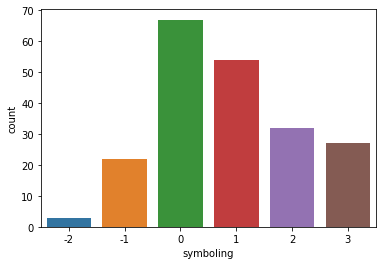

In [176]:
#symboling -> sigorta riski
sns.countplot(data.symboling)

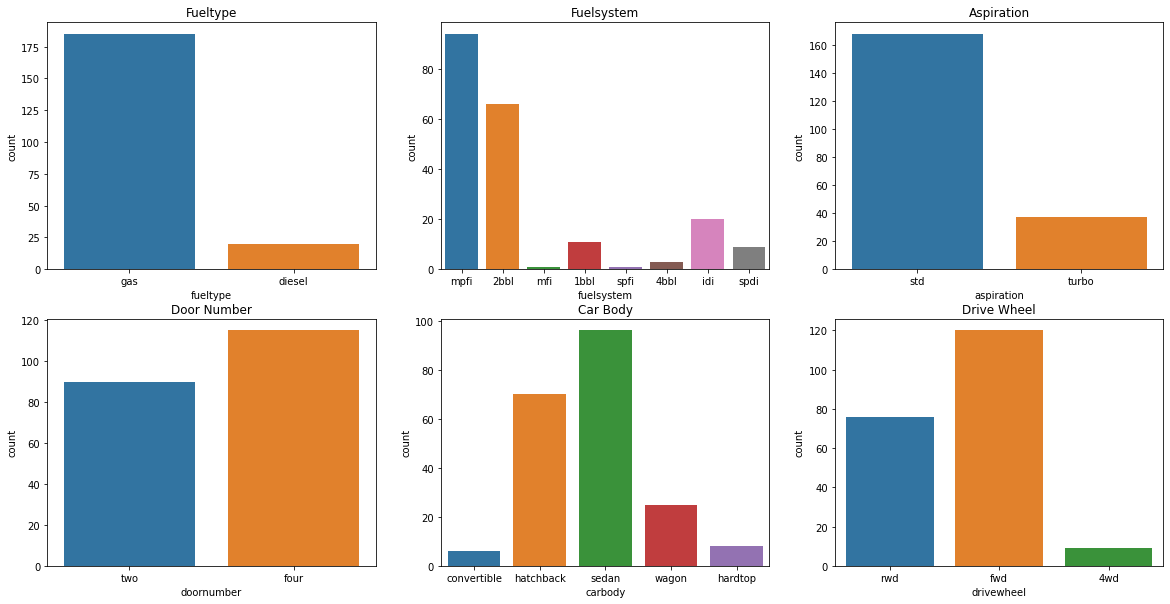

In [177]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title('Fueltype')
sns.countplot(data.fueltype)
# benzinli (gas) arabalar çoğunlukta


plt.subplot(2,3,2)
plt.title('Fuelsystem')
sns.countplot(data.fuelsystem)
# mpfi (multi point fuel injection) en çok tercih edilen, yeni teknoloji


plt.subplot(2,3,3)
plt.title('Aspiration')
sns.countplot(data.aspiration)
# çoğunluk standart beslemeli


plt.subplot(2,3,4)
plt.title('Door Number')
sns.countplot(data.doornumber)
# çoğunluk 4 kapılı


plt.subplot(2,3,5)
plt.title('Car Body')
sns.countplot(data.carbody)
# çoğunluk sedan


plt.subplot(2,3,6)
plt.title('Drive Wheel')
sns.countplot(data.drivewheel)
# çekiş sistemi, standart çeker çoğunlukta

plt.show()

#### İkili (Bivariate) Analiz

Şimdi değişkenlerin Fiyat'ı nasıl etkilediğini görmeye çalışalım:

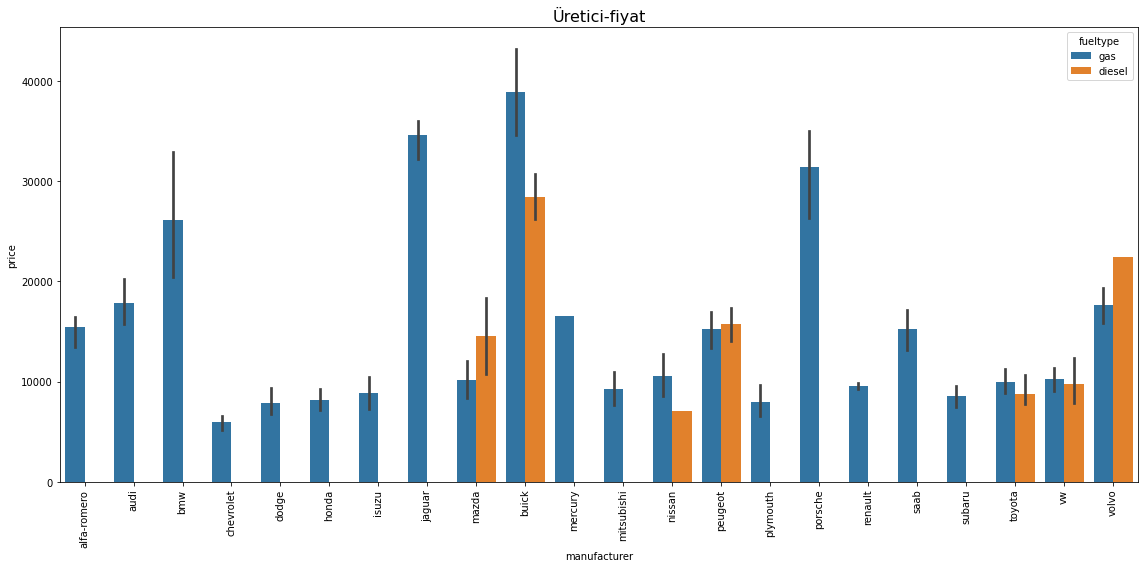

In [178]:
#üretici bazlı fiyatlar
plt.figure(figsize=(16,8))
plt.title("Üretici-fiyat", fontsize=16)
sns.barplot(x=data.manufacturer, y= df.price,
           hue=data.fueltype)
plt.xticks(rotation=90)
plt.tight_layout()

<AxesSubplot:xlabel='symboling', ylabel='price'>

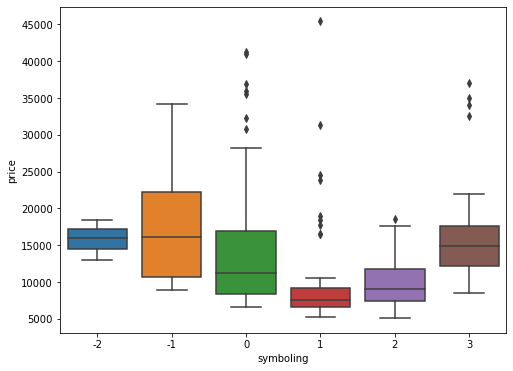

In [179]:
#price- symboling
plt.figure(figsize=(8,6))
sns.boxplot(data.symboling, data.price)


<AxesSubplot:xlabel='fueltype', ylabel='price'>

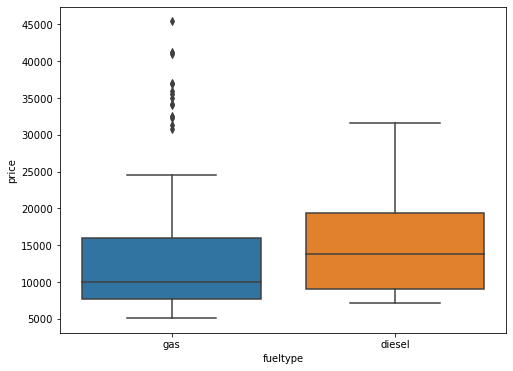

In [180]:
#price- fueltype
plt.figure(figsize=(8,6))
sns.boxplot(data.fueltype, data.price)

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

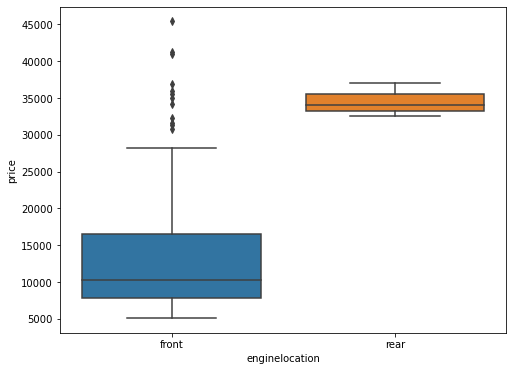

In [181]:
#price- enginelocation
plt.figure(figsize=(8,6))
sns.boxplot(data.enginelocation, data.price)

#motoru arkada olan araçların fiyatı çok yüksek
#çoğunlukla motoru önde olan araçlar var

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

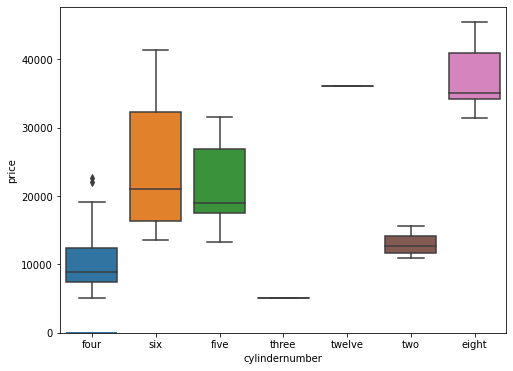

In [182]:
#price- cylinder number
plt.figure(figsize=(8,6))
sns.countplot(data.cylindernumber)
sns.boxplot(data.cylindernumber, data.price)

<AxesSubplot:xlabel='price', ylabel='Density'>

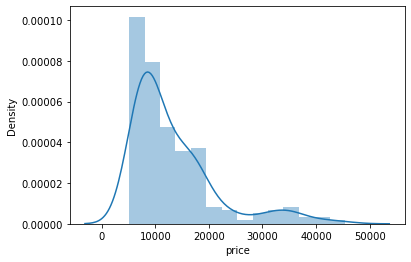

In [183]:
#fiyatın kendi içindeki dağılımı
sns.distplot(data.price)

#fiyat genellikle 5k ile 20k dolar arasında dağılıyor.

<AxesSubplot:title={'center':'Fiyat dağılımı'}, ylabel='price'>

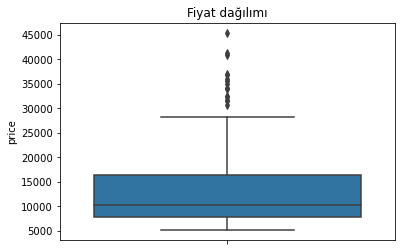

In [184]:
plt.title("Fiyat dağılımı")
sns.boxplot(y=data.price)

In [185]:
data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

şimdi ikili grafiklerin (pair-plot) tümüne birlikte bakalım

In [186]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [187]:
cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
        'curbweight', 'enginesize', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [188]:
len(cols)

13

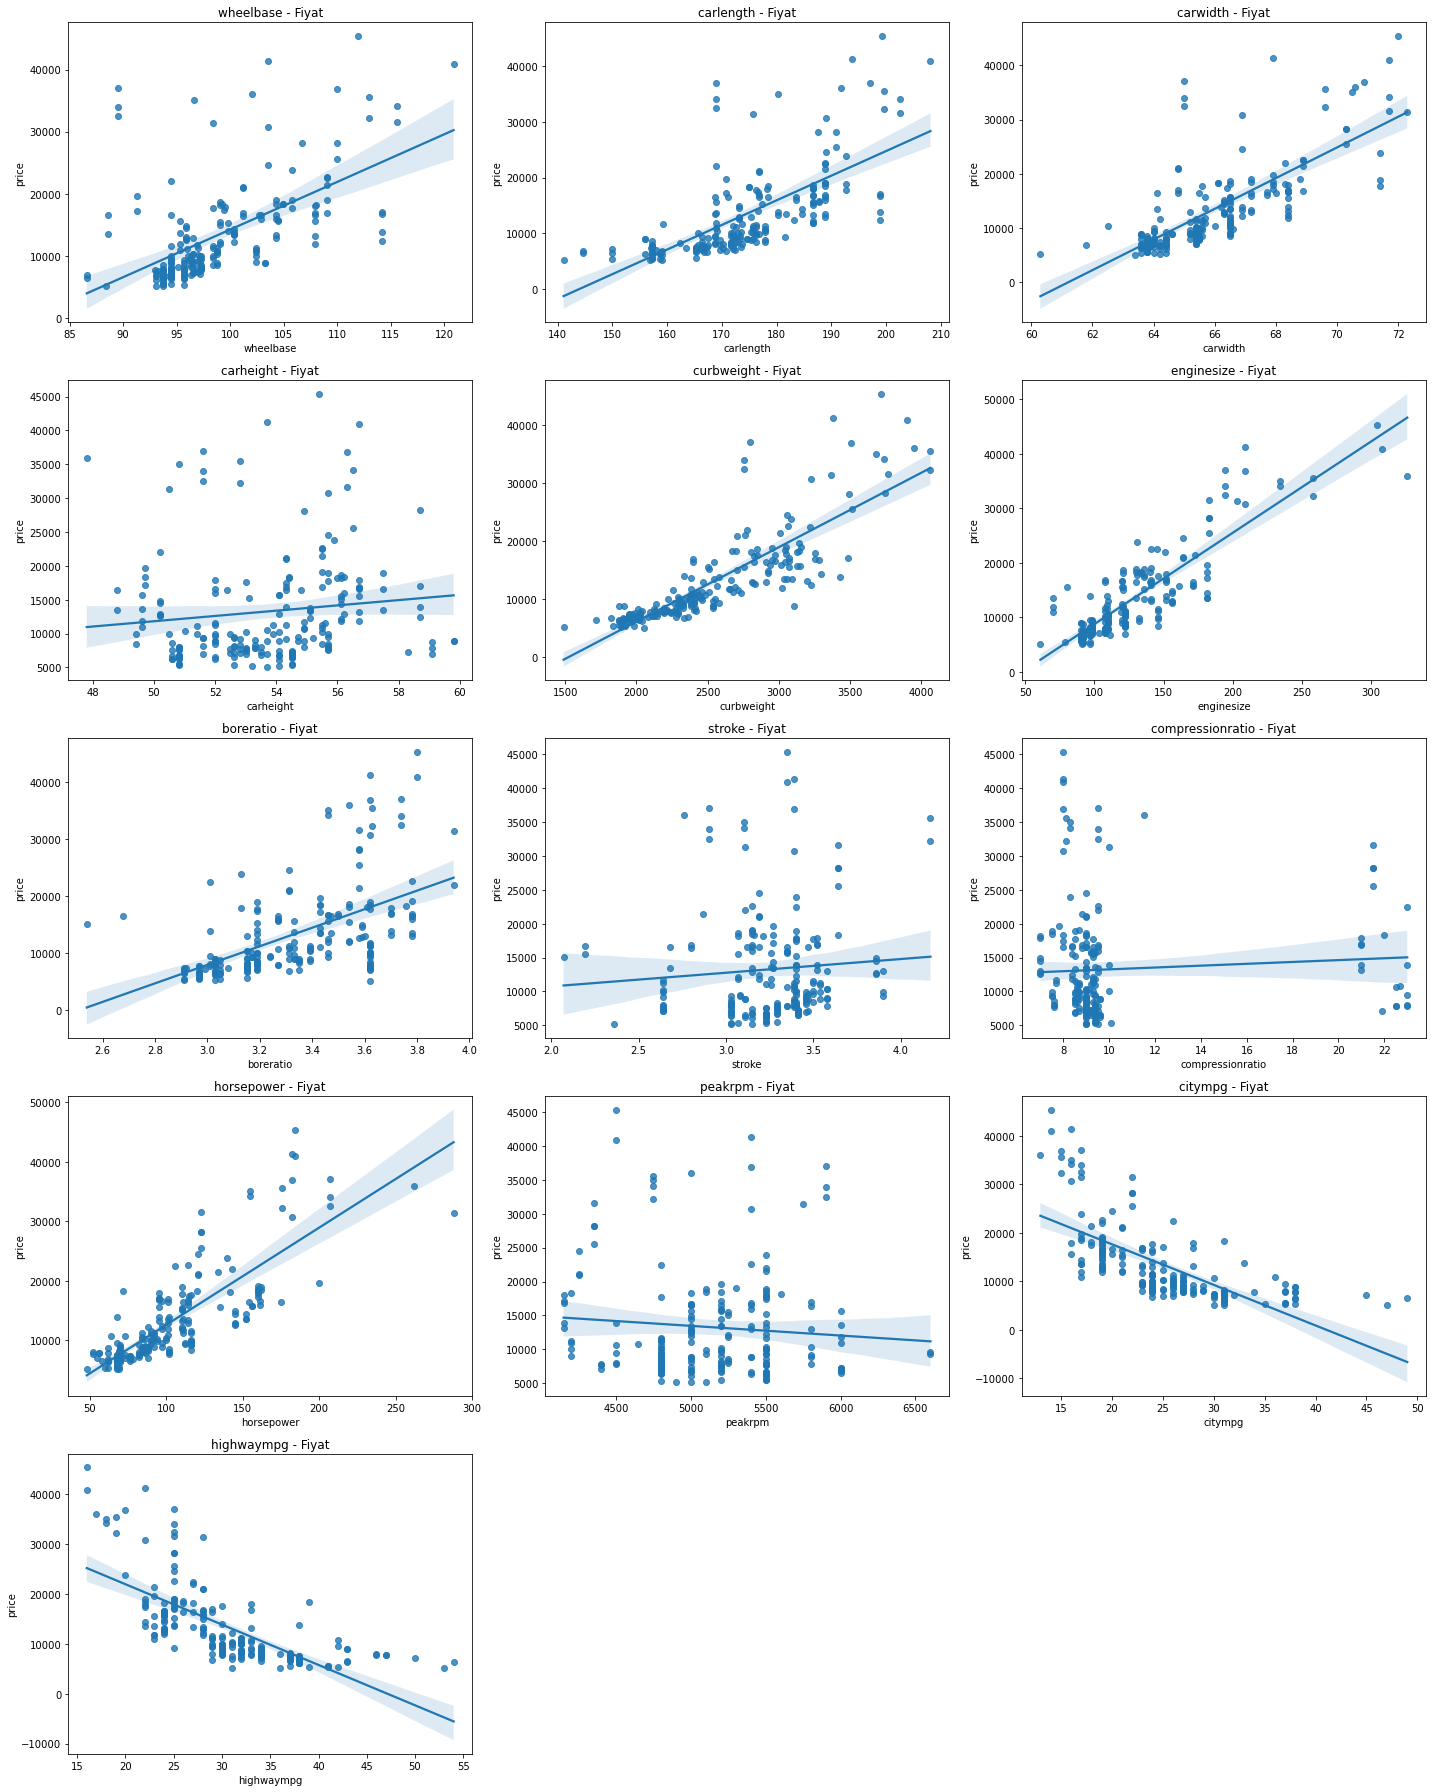

In [189]:
# regresyon doğruları ile ilişkiyi görelim

plt.figure(figsize=(20,25))

for i in range(len(cols)):
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')
    sns.regplot(x=eval('data' + '.' + cols[i]), y=data.price)
    
plt.tight_layout()

Burada nerdeyse tüm değişkenleri önemli. Yani fiyat üzerinde etkisi olabilir.

Etkisiz olanlar:
* carheight
* stroke
* compression ratio
* peak rpm
* highway mpg
* city mpg

Bunları çıkarabiliriz.

In [190]:
#yeni sütunlara yeni data
data_new=data[['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
        'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price']]

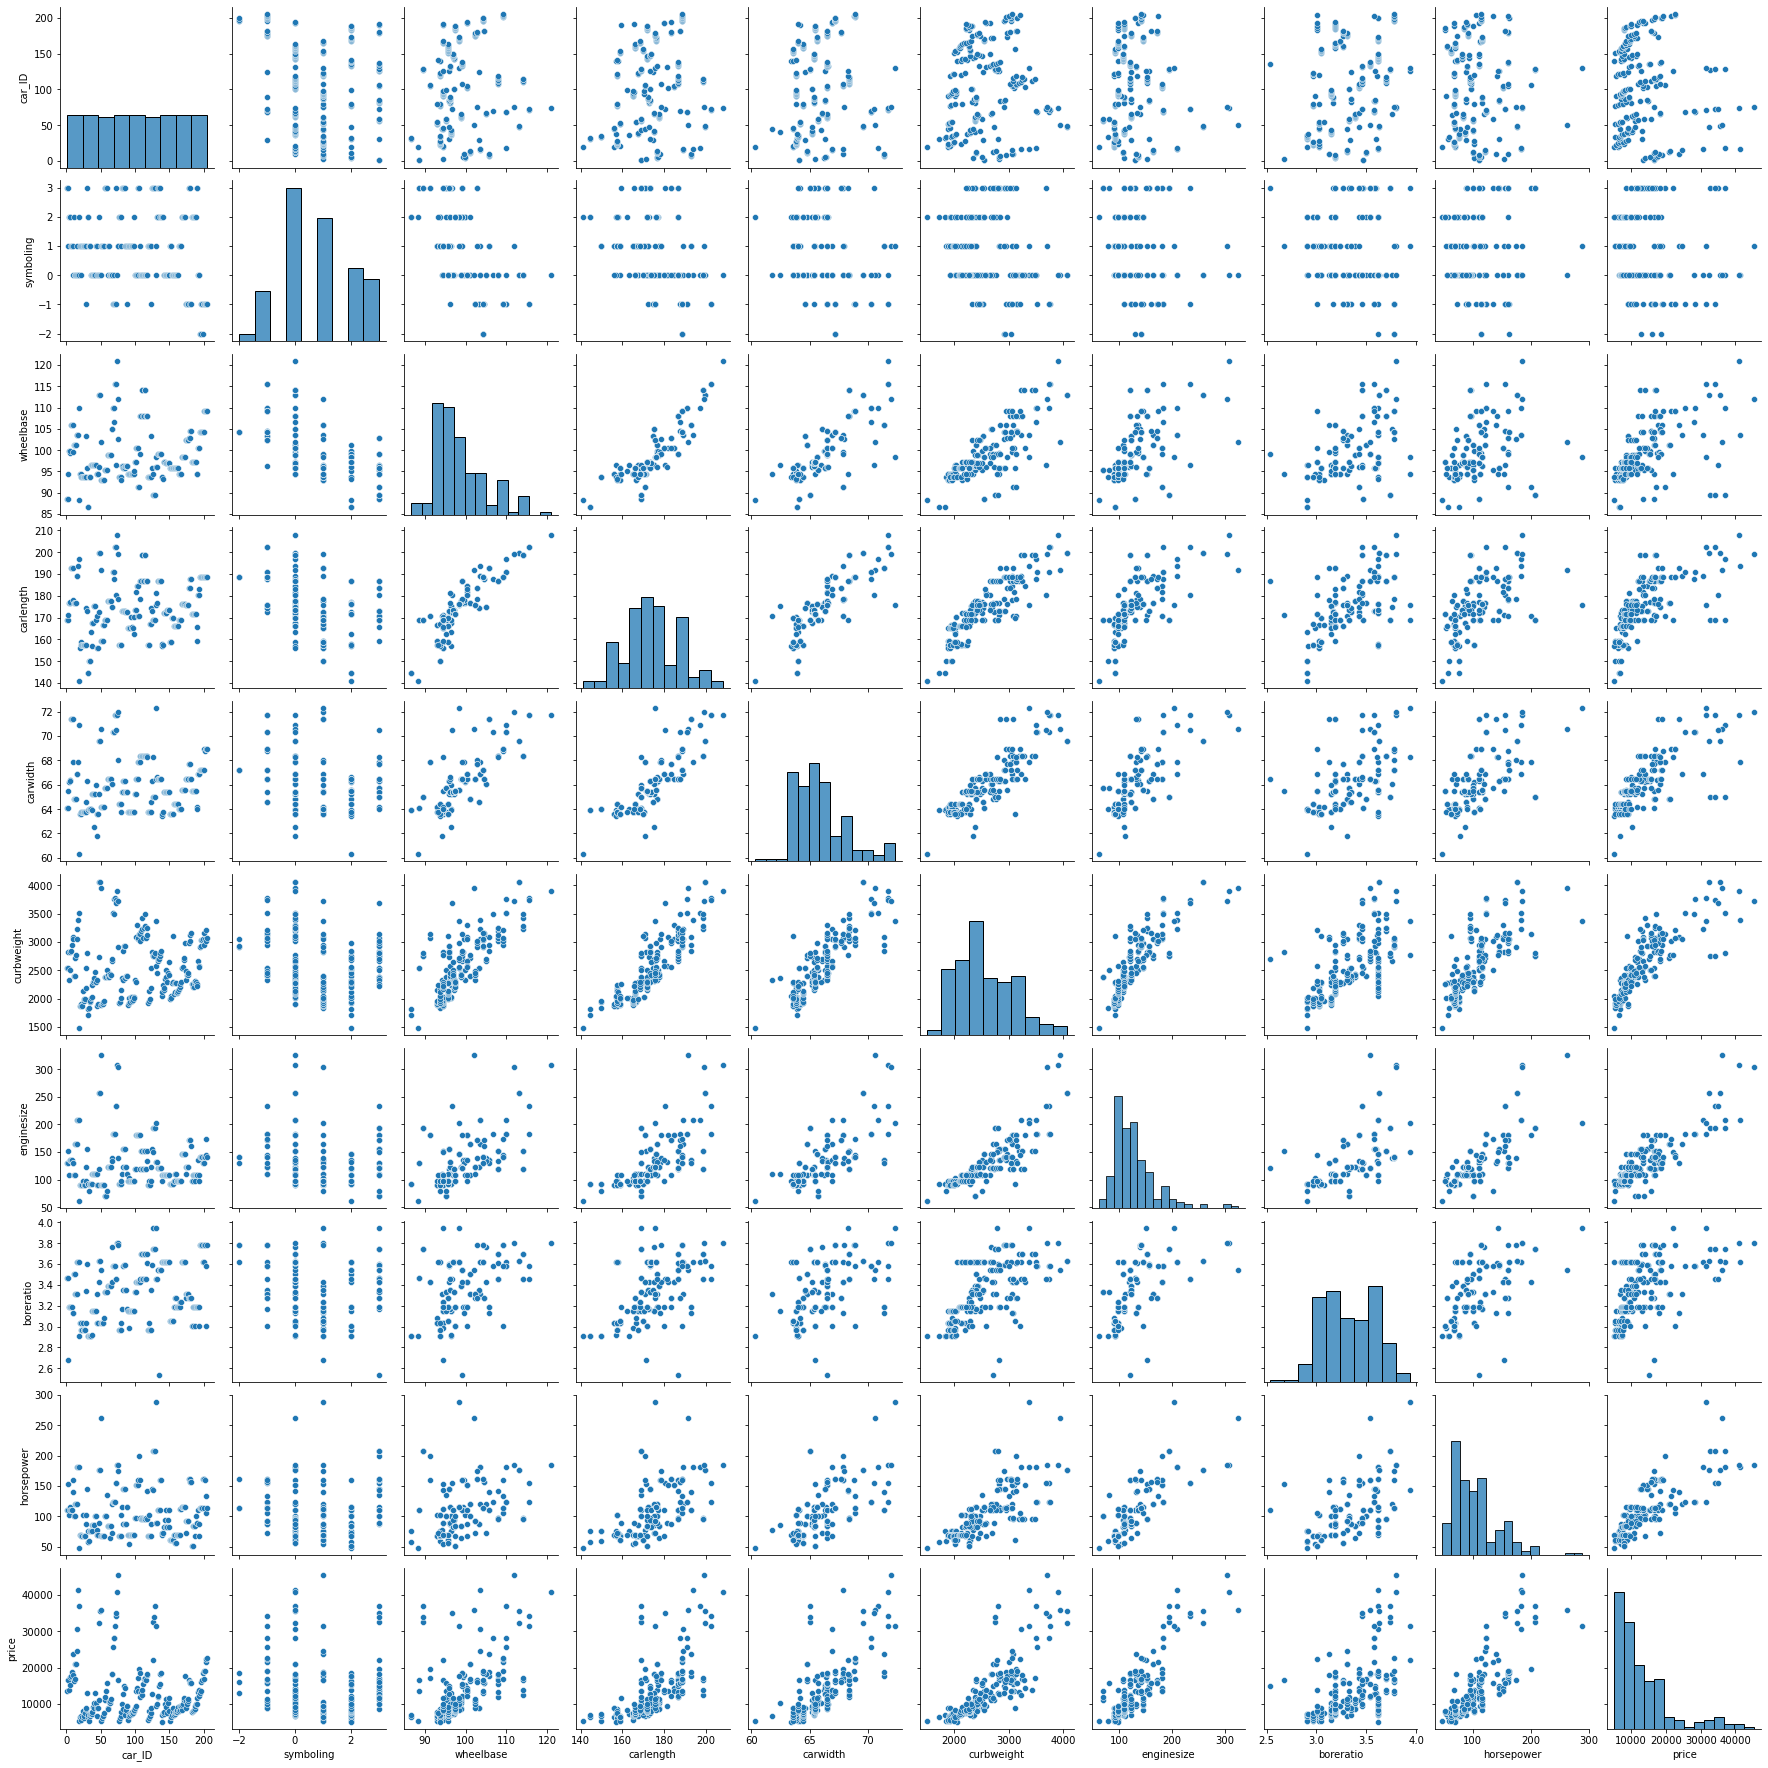

In [191]:
sns.pairplot(data_new)

#### Feature Engineering

Datayı daha iyi modellemek için yeni özellikler (feature) bulma veya özelliklerden bazılarını eleme işine **Feature Engineering** denir.

**Tork (Torque)**: 

Tork, motorun dönme kuvvetinin; araçta tekerlekleri itme kuvvetine dönüştürülmesini sağlamaktadır. Yani bir nevi, aracın çekiş gücü ile ilgilidir. 

Dolayısı ile Tork'u yüksek olan arabaların daha pahalı olması beklenebilir.

**Torque = 5252 x HP / RPM**

In [192]:
torque= data.horsepower* 5252/ data.peakrpm

In [193]:
torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Length: 205, dtype: float64

In [194]:
data.insert(10, "torque", pd.Series(data.horsepower* 5252 / data.peakrpm,
                                    index=data.index))

In [195]:
data.torque

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
200    110.875556
201    158.550943
202    127.957818
203    115.981667
204    110.875556
Name: torque, Length: 205, dtype: float64

<AxesSubplot:title={'center':'Torque- Fiyat'}, xlabel='torque', ylabel='price'>

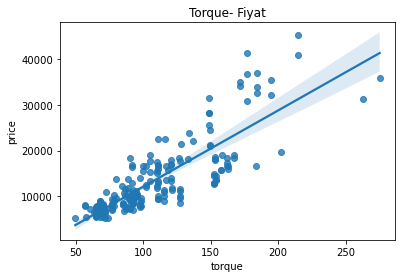

In [196]:
#torque ile fiyat arasındaki ilişki
plt.title("Torque- Fiyat")
sns.regplot(x=data.torque, y= data.price)

<AxesSubplot:xlabel='torque', ylabel='Density'>

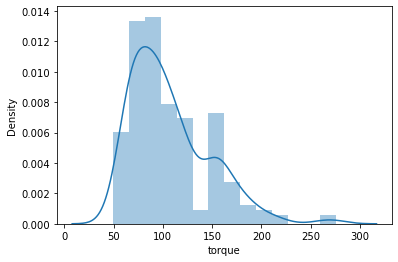

In [197]:
#Torque'un kendi içerisindeki dağılımına bakalım
sns.distplot(data.torque)

**Yakıt Ekonomisi**:

Arabanın şehir içinde ve şehir dışında ortalama yakıt tüketimi.

In [198]:
data["fueleconomy"]= (0.55*data.citympg)+ (0.45*data.highwaympg)

Not: yukarıdaki katsayılara ortalama bir değer atadım

In [199]:
data.fueleconomy

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: fueleconomy, Length: 205, dtype: float64

Son olarak model için önemli değişkenleri bırakıp diğerlerini silelim:

In [200]:
#Silinecekler

data.drop(columns=['car_ID','manufacturer','doornumber','carheight',
                   'compressionratio', 'symboling','stroke','citympg',
                   'highwaympg', 'fuelsystem', 'peakrpm'], 
          axis=1, inplace=True)

In [201]:
data.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,torque,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,fueleconomy
0,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,gas,std,hatchback,rwd,front,94.5,161.761600,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,gas,std,sedan,fwd,front,99.8,97.400727,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,gas,std,sedan,4wd,front,99.4,109.814545,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


In [206]:
data.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,torque,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,fueleconomy
0,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,23.70
1,gas,std,convertible,rwd,front,88.6,116.594400,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,23.70
2,gas,std,hatchback,rwd,front,94.5,161.761600,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,22.15
3,gas,std,sedan,fwd,front,99.8,97.400727,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,26.70
4,gas,std,sedan,4wd,front,99.4,109.814545,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,19.80


#### Model Tanımlama

In [207]:
cars=data.copy()

Kategorik değişkenler için dummy variable'ları alalım:

**pd.get_dummies()**

In [208]:
# kategorik sütunlar

dummies_list = ['fueltype', 'aspiration', 'carbody','drivewheel',
                'enginelocation', 'enginetype', 'cylindernumber']

In [209]:
for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('cars' + '.' + i), drop_first=True)
    
    cars = pd.concat([cars, temp_df], axis=1)
    
    cars.drop([i], axis=1, inplace=True)

In [210]:
cars.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,88.6,116.594400,168.8,64.1,2548,130,3.47,111,13495.0,23.70,...,0,0,0,0,0,1,0,0,0,0
1,88.6,116.594400,168.8,64.1,2548,130,3.47,111,16500.0,23.70,...,0,0,0,0,0,1,0,0,0,0
2,94.5,161.761600,171.2,65.5,2823,152,2.68,154,16500.0,22.15,...,0,0,1,0,0,0,1,0,0,0
3,99.8,97.400727,176.6,66.2,2337,109,3.19,102,13950.0,26.70,...,1,0,0,0,0,1,0,0,0,0
4,99.4,109.814545,176.6,66.4,2824,136,3.19,115,17450.0,19.80,...,1,0,0,0,1,0,0,0,0,0


pd.get_dummies(drop_first=True) yaptığımız için verdiğimiz listedeki sütunlar için 1-0 (one-hot encoding) sütunları yarattı. 

Her bir kategor için bir sütun olarak, sadece birer eksik olarak. (drop_first=True)

In [211]:
# std'yi atmış, sadece turbo adında bir sütun yaratmış
# baz değişken -> std

data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [212]:
# convertible'ı atmış, diğerleri için sütun yaratmış
# baz değişken -> convertible

data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [213]:
# 4wd'yi atmış, diğerleri için sütun yaratmış 
# baz değişken -> 4wd

data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [214]:
# eight'i atmış diğerlerini almış
# baz değişken -> eight

data.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

##### Train-Test Split

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
train_data,test_data=train_test_split(cars, train_size= 0.3, random_state=42)

In [217]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
185,97.3,85.032381,171.7,65.5,2212,109,3.19,85,8195.0,30.15,...,1,0,0,0,0,1,0,0,0,0
161,95.7,76.591667,166.3,64.4,2122,98,3.19,70,8358.0,30.70,...,1,0,0,0,0,1,0,0,0,0
190,94.5,85.941818,165.7,64.0,2221,109,3.19,90,9980.0,26.25,...,1,0,0,0,0,1,0,0,0,0
49,102.0,275.204800,191.7,70.6,3950,326,3.54,262,36000.0,14.80,...,0,0,1,0,0,0,0,0,1,0
80,96.3,110.769455,173.0,65.4,2370,110,3.17,116,9959.0,26.15,...,1,0,0,0,0,1,0,0,0,0


In [218]:
test_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
15,103.5,177.011852,189.0,66.9,3230,209,3.62,182,30760.000,18.70,...,1,0,0,0,0,0,1,0,0,0
9,99.5,152.785455,178.2,67.9,3053,131,3.13,160,17859.167,18.70,...,1,0,0,0,1,0,0,0,0,0
100,97.2,97.970000,173.4,65.2,2302,120,3.33,97,9549.000,30.15,...,1,0,0,0,0,1,0,0,0,0
132,99.1,110.041905,186.6,66.5,2658,121,3.54,110,11850.000,24.15,...,1,0,0,0,0,1,0,0,0,0
68,110.0,148.504828,190.9,70.3,3750,183,3.58,123,28248.000,23.35,...,1,0,0,0,1,0,0,0,0,0


**Scaling**

Değişken boyutlarının farklı olması bir sorundur. Bunun için hepsi kendi içinde boyutlandırılır.

Min-Max Scaling -> 0 ile 1 arasında yeniden boyutlar:
$$X_{scaled} = (X - X_{min}) / (X_{max} - X_{min}) $$

burada:

$X_{minScaled} = 0$

ve

$X_{maxScaled} = 1$

olur.

In [219]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
scaler=MinMaxScaler()

In [221]:
#numerik kolonları scale edelim
# price hariç -> price(y) değişkeni scale edilmez.

scale_cols=['wheelbase', 'torque','carlength','carwidth','curbweight',
              'enginesize', 'horsepower','fueleconomy','boreratio']

In [222]:
train_data[scale_cols]= scaler.fit_transform(train_data[scale_cols])

In [223]:
train_data.head()

,wheelbase,torque,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,fueleconomy,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
185,0.322222,0.095584,0.412548,0.218391,0.153425,0.152344,0.464286,0.101770,8195.0,0.563303,...,1,0,0,0,0,1,0,0,0,0
161,0.262963,0.055442,0.309886,0.091954,0.112329,0.109375,0.464286,0.035398,8358.0,0.583486,...,1,0,0,0,0,1,0,0,0,0
190,0.218519,0.099909,0.298479,0.045977,0.157534,0.152344,0.464286,0.123894,9980.0,0.420183,...,1,0,0,0,0,1,0,0,0,0
49,0.496296,1.000000,0.792776,0.804598,0.947032,1.000000,0.714286,0.884956,36000.0,0.000000,...,0,0,1,0,0,0,0,0,1,0
80,0.285185,0.217984,0.437262,0.206897,0.225571,0.156250,0.450000,0.238938,9959.0,0.416514,...,1,0,0,0,0,1,0,0,0,0


In [224]:
y_train= train_data.pop("price")

In [225]:
y_train.head()

185     8195.0
161     8358.0
190     9980.0
49     36000.0
80      9959.0
Name: price, dtype: float64

In [226]:
X_train=train_data

**Çoklu Lineer Regresyon için kütüphaneler:**

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn. feature_selection import RFE
import statsmodels.api as sm

In [228]:
#lineer regresyon nesnesi oluşturalım
lr=LinearRegression()

In [229]:
#lineer regresyonu ver ile train(fit- öğrenmek) edelim
lr.fit(X_train,y_train)

LinearRegression()

**RFE (Recursive Feature Elimination)**:

Her seferinde bir değişken azaltarak (backward elimination) geriye doğru Çoklu Lineer Regresyon çalıştırır.

Bu şekilde eleme yaparak parametre olarak verilen `n_features_to_select` adedine kadar gelir.

Her elemede en önemsiz olanı eler. (p-değeri en büyük olanı yani)

In [230]:
# RFE'yi hazırlama
#RFE(estimator, n_features_to_select)
#geriye 10 adet değişken bırakacak şekilde RFE tamamla

rfe=RFE(lr,10)

In [231]:
#rfe'yi train edelim
rfe=rfe.fit(X_train,y_train)

In [232]:
rfe.support_

array([ True,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False])

In [233]:
rfe.ranking_

array([ 1,  1,  5, 11,  2,  1,  3,  1, 19, 15, 14, 18,  1,  1,  1,  7,  8,
       20,  1, 16,  6,  1, 17,  1, 12,  9, 13, 21, 10,  4])

In [234]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('torque', True, 1),
 ('carlength', False, 5),
 ('carwidth', False, 11),
 ('curbweight', False, 2),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('horsepower', True, 1),
 ('fueleconomy', False, 19),
 ('gas', False, 15),
 ('turbo', False, 14),
 ('hardtop', False, 18),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 7),
 ('rwd', False, 8),
 ('rear', False, 20),
 ('dohcv', True, 1),
 ('l', False, 16),
 ('ohc', False, 6),
 ('ohcf', True, 1),
 ('ohcv', False, 17),
 ('rotor', True, 1),
 ('five', False, 12),
 ('four', False, 9),
 ('six', False, 13),
 ('three', False, 21),
 ('twelve', False, 10),
 ('two', False, 4)]

In [235]:
#sadece seçilmiş sütunlar
X_train.columns[rfe.support_]

Index(['wheelbase', 'torque', 'enginesize', 'horsepower', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'ohcf', 'rotor'],
      dtype='object')

In [236]:
#dolayısıyla artık en önemli olan sütunları biliyoruz
X_train_rfe= X_train[X_train.columns[rfe.support_]]

In [237]:
X_train_rfe

,wheelbase,torque,enginesize,horsepower,hatchback,sedan,wagon,dohcv,ohcf,rotor
185,0.322222,0.095584,0.152344,0.101770,0,1,0,0,0,0
161,0.262963,0.055442,0.109375,0.035398,1,0,0,0,0,0
190,0.218519,0.099909,0.152344,0.123894,1,0,0,0,0,0
49,0.496296,1.000000,1.000000,0.884956,0,1,0,0,0,0
80,0.285185,0.217984,0.156250,0.238938,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
106,0.392593,0.459722,0.433594,0.433628,1,0,0,0,0,0
14,0.551852,0.402308,0.367188,0.261062,0,1,0,0,0,0
92,0.218519,0.022619,0.105469,0.030973,0,1,0,0,0,0
179,0.529630,0.464525,0.394531,0.438053,1,0,0,0,0,0


#### OLS Analizi:

In [238]:
# OLS için kopyalayalım 
X_train_rfemodel= X_train_rfe.copy()

In [239]:
# statsmodels için add_constant -> beta_0 için 1lerden oluşan sütun ekleyeceğiz
X_train_rfemodel= sm.add_constant(X_train_rfemodel)

In [240]:
X_train_rfemodel.head()

,const,wheelbase,torque,enginesize,horsepower,hatchback,sedan,wagon,dohcv,ohcf,rotor
185,1.0,0.322222,0.095584,0.152344,0.101770,0,1,0,0,0,0
161,1.0,0.262963,0.055442,0.109375,0.035398,1,0,0,0,0,0
190,1.0,0.218519,0.099909,0.152344,0.123894,1,0,0,0,0,0
49,1.0,0.496296,1.000000,1.000000,0.884956,0,1,0,0,0,0
80,1.0,0.285185,0.217984,0.156250,0.238938,1,0,0,0,0,0


In [241]:
#OLS çalıştıralım
lr=sm.OLS(y_train, X_train_rfemodel).fit()

In [242]:
#özeti görelim
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     53.81
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.92e-23
Time:                        12:56:38   Log-Likelihood:                -567.92
No. Observations:                  61   AIC:                             1158.
Df Residuals:                      50   BIC:                             1181.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.073e+04   2226.624      4.820      0.0

In [243]:
X_train_rfemodel=X_train_rfemodel.drop(["ohcf"], axis=1)

Tekrar bir OLS çalıştıracağız.

Bunu bir fonksiyon içinde yapalım:

In [244]:
def train_ols(X,y):
    X=sm.add_constant(X)
    lr=sm.OLS(y,X).fit()
    print(lr.summary())

In [245]:
train_ols(X_train_rfemodel,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     57.67
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.30e-23
Time:                        12:56:39   Log-Likelihood:                -569.48
No. Observations:                  61   AIC:                             1159.
Df Residuals:                      51   BIC:                             1180.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.113e+04   2248.208      4.948      0.0

In [246]:
X_train_rfemodel = X_train_rfemodel.drop(['dohcv'],axis=1)
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     62.68
Date:                Tue, 24 May 2022   Prob (F-statistic):           5.44e-24
Time:                        12:56:39   Log-Likelihood:                -570.97
No. Observations:                  61   AIC:                             1160.
Df Residuals:                      52   BIC:                             1179.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.124e+04   2280.533      4.929      0.0

In [247]:
X_train_rfemodel = X_train_rfemodel.drop(['torque'],axis=1)
train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     71.48
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.01e-24
Time:                        12:56:40   Log-Likelihood:                -571.56
No. Observations:                  61   AIC:                             1159.
Df Residuals:                      53   BIC:                             1176.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.14e+04   2274.908      5.013      0.0

Artık geriye kalan değişkenlerin hepsi de önemli.

Burada durabiliriz.

#### Katsayıların Önem Sırası

In [248]:
X_train.columns

Index(['wheelbase', 'torque', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two'],
      dtype='object')

In [249]:
X_train_final= X_train[['wheelbase','enginesize','horsepower','hatchback',
                        'sedan', 'wagon','rotor']]

In [250]:
X_train_final.columns

Index(['wheelbase', 'enginesize', 'horsepower', 'hatchback', 'sedan', 'wagon',
       'rotor'],
      dtype='object')

In [251]:
X_train_final.head()

,wheelbase,enginesize,horsepower,hatchback,sedan,wagon,rotor
185,0.322222,0.152344,0.101770,0,1,0,0
161,0.262963,0.109375,0.035398,1,0,0,0
190,0.218519,0.152344,0.123894,1,0,0,0
49,0.496296,1.000000,0.884956,0,1,0,0
80,0.285185,0.156250,0.238938,1,0,0,0


In [252]:
lr_final=LinearRegression()
lr_final.fit(X_train_final, y_train)

LinearRegression()

In [253]:
lr_final.coef_

array([ 13290.99880799,  17909.37536869,  13052.72699475, -10759.98208884,
        -9931.71401867, -12244.81235142,   7119.20366871])

In [254]:
katsayılar= pd.DataFrame(lr_final.coef_, index=['wheelbase', 'enginesize', 
                                                'horsepower', 'hatchback', 
                                                'sedan', 'wagon','rotor'], columns=['Katsayı'])

katsayılar.sort_values(by=['Katsayı'], ascending=False)

,Katsayı
enginesize,17909.375369
wheelbase,13290.998808
horsepower,13052.726995
rotor,7119.203669
sedan,-9931.714019
hatchback,-10759.982089
wagon,-12244.812351


Görüldüğü gibi en önemli değişkenler sırasıyla:

* enginesize
* wheelbase
* horsepower
* rotor
* sedan
* hatchback
* wagon

**Son Analizler:**

**1- Fiyatı en çok artıran değişken `enginesize`.**

<AxesSubplot:title={'center':'Engine Size'}, xlabel='enginesize', ylabel='price'>

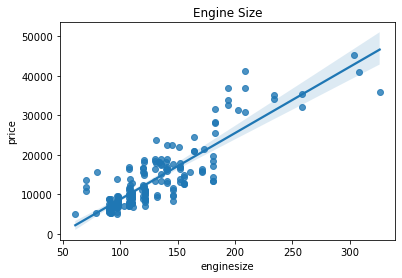

In [256]:
plt.title("Engine Size")
sns.regplot(x=data.enginesize, y=data.price)

**2- Fiyatı en çok artıran değişken `wheelbase`.**

<AxesSubplot:title={'center':'Wheel Base'}, xlabel='wheelbase', ylabel='price'>

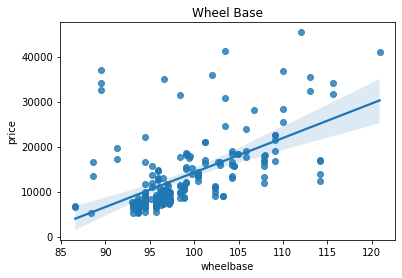

In [258]:
plt.title("Wheel Base")
sns.regplot(x=data.wheelbase, y=data.price)

**3- `horsepower` yani beygir gücü fiyatı artırıyor.**

<AxesSubplot:title={'center':'Horsepower'}, xlabel='horsepower', ylabel='price'>

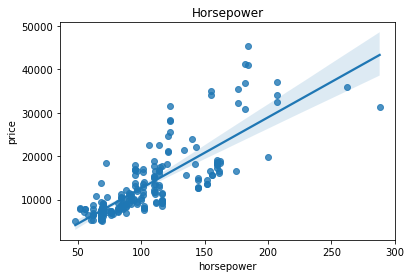

In [259]:
plt.title("Horsepower")
sns.regplot(x=data.horsepower, y=data.price)

**4- `rotor` değişkeni enginetype'dan geldi.**

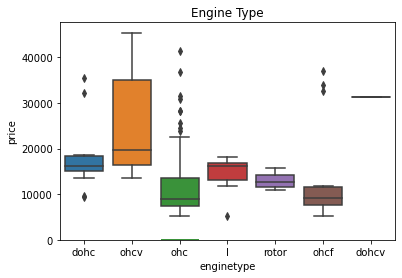

In [262]:
plt.title('Engine Type')
sns.countplot(data.enginetype)
sns.boxplot(x=data.enginetype, y=data.price)
plt.show()

**5- `Sedan- hatchback- wagon` değişkenleri `carbody` den geliyor.**

carbody -> ['convertible, hatchback, sedan, wagon, hardtop']

baz değişken -> convertible

Şu şekilde yorumlarız (baz değişken üzerinden):
* convertible'ı seçmeyip sedan'ı seçersen: fiyattaki değişim -> -9931.714019
* convertible'ı seçmeyip hatchback'i seçersen: fiyattaki değişim -> -10759.982089
* convertible'ı seçmeyip wagon'ı seçersen: fiyattaki değişim -> -12244.812351

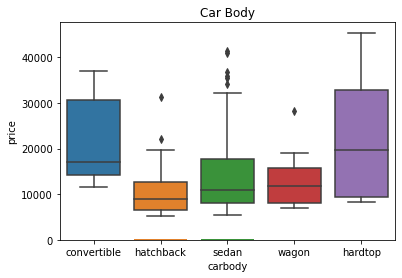

In [264]:
plt.title('Car Body')
sns.countplot(data.carbody)
sns.boxplot(x=data.carbody, y=data.price)
plt.show()
